# Mathematical Tools
### Approximation
Most frequently used numerical tools: Regression and interpolation
### Optimization
Optimiztion tools are widely used in financial area(ex. model calibration when calculating the price of an option)
### Integration
Almost all financial instruments' values are derived from calculation by Integration.

### Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

Text(0,0.5,'f(x)')

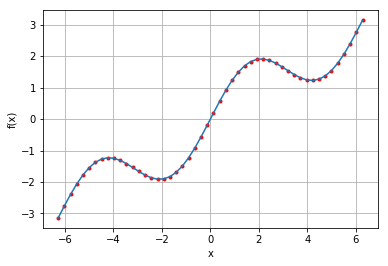

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi)
plt.plot(x, f(x), 'r.')
plt.plot(x, f(x))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [4]:
reg = np.polyfit(x, f(x), deg = 1)
y_hat = np.polyval(reg, x)

Text(0.5,1,'Regression with monomials up to order 1')

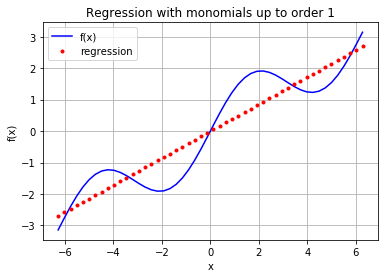

In [5]:
plt.plot(x, f(x), 'b', label = 'f(x)', linewidth = 1.5)
plt.plot(x, y_hat, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with monomials up to order 1')

Text(0.5,1,'Regression with monomials up to order 5')

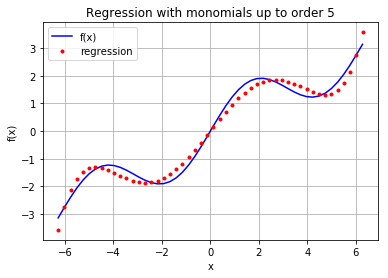

In [6]:
reg = np.polyfit(x, f(x), deg = 5)
y_hat = np.polyval(reg, x)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, y_hat, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with monomials up to order 5')

Text(0.5,1,'Regression with monomials up to order 7')

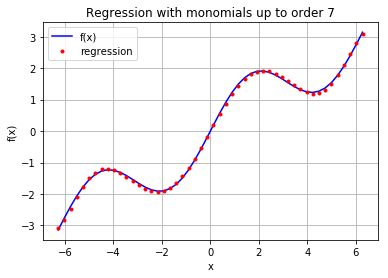

In [7]:
reg = np.polyfit(x, f(x), deg = 7)
y_hat = np.polyval(reg, x)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, y_hat, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with monomials up to order 7')

In [8]:
np.allclose(f(x), y_hat)

False

In [9]:
mse = ((f(x) - y_hat)**2).mean()
mse

0.0017769134759517593

### Individual Basis Functions

In [10]:
matrix = np.zeros((len(x), 3 + 1))
matrix[:, 0] = 1
matrix[:, 1] = x
matrix[:, 2] = x ** 2
matrix[:, 3] = x ** 3
matrix[:5, :]

array([[   1.        ,   -6.28318531,   39.4784176 , -248.05021344],
       [   1.        ,   -6.02672876,   36.3214596 , -218.89958529],
       [   1.        ,   -5.77027222,   33.2960415 , -192.12722335],
       [   1.        ,   -5.51381568,   30.40216333, -167.63192479],
       [   1.        ,   -5.25735913,   27.63982507, -145.31248681]])

In [11]:
beta, resid, rank, s = np.linalg.lstsq(matrix, f(x)) 
# returns beta, residual, rank(A), and sigular values of A.
beta

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


array([ 1.50654604e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03])

In [12]:
y_hat = np.dot(matrix, beta)

In [13]:
?np.linalg.lstsq

Text(0.5,1,'Regression via least-squares function with order 3')

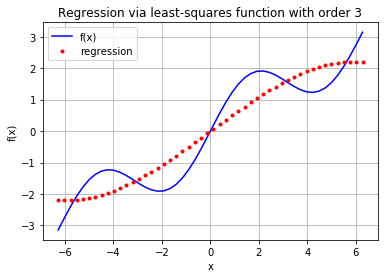

In [14]:
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, y_hat, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression via least-squares function with order 3')

In [15]:
matrix[:, 3] = np.sin(x)
beta, resid, rank, s = np.linalg.lstsq(matrix, f(x))
y_hat = np.dot(matrix, beta)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


Text(0.5,1,'Regression using individual functions')

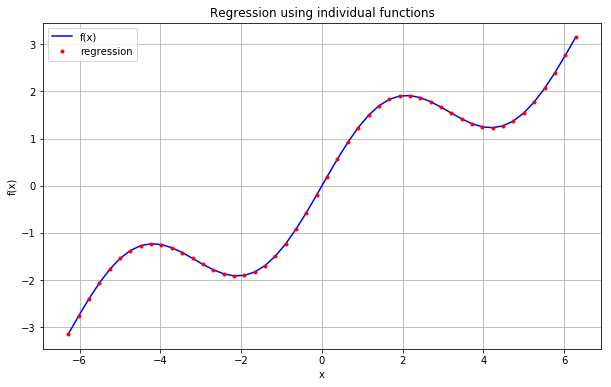

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), 'b', label = "f(x)") 
plt.plot(x, y_hat, 'r.', label = "regression")
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression using individual functions')

In [17]:
np.allclose(f(x), y_hat)
# Returns True if two arrays are 
# element-wise equal within a tolerance.

True

In [18]:
mse = np.sum((f(x) - y_hat)**2)/len(x)
mse ## equals 0.

4.104850046269179e-31

In [19]:
beta

array([4.2004068e-16, 5.0000000e-01, 0.0000000e+00, 1.0000000e+00])

### Noisy Data

In [20]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn += 0.15 * np.random.randn(len(xn))
yn = f(xn) + 0.25 * np.random.randn(len(xn))

In [21]:
beta = np.polyfit(xn, yn, deg = 7)
y_hat = np.polyval(beta, xn)

Text(0.5,1,'Regression with noisy data')

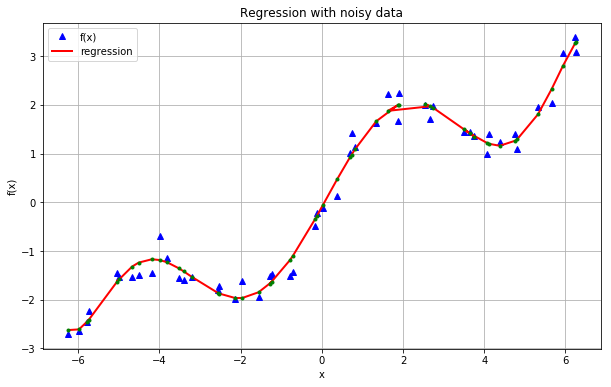

In [22]:
plt.figure(figsize = (10, 6))
plt.plot(xn, yn, 'b^', label = 'f(x)')
plt.plot(xn, y_hat, 'r', linewidth = 2, label = 'regression')
plt.plot(xn, y_hat, 'g.')
plt.legend(loc=0)
plt.grid(True)
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with noisy data')

### Unsorted Data

In [23]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi 
# create random 50 numbers from Uniform(-2*pi, 2*pi)
yu = f(xu)

In [24]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-5.53  3.13 -3.16 -3.42  6.21 -0.96  1.66  4.21 -1.48  3.21]
[-2.08  1.58 -1.56 -1.44  3.03 -1.3   1.83  1.23 -1.74  1.54]


In [25]:
beta = np.polyfit(xu, yu, 5)
y_hat = np.polyval(beta, xu)

Text(0.5,1,'Regression with unsorted data')

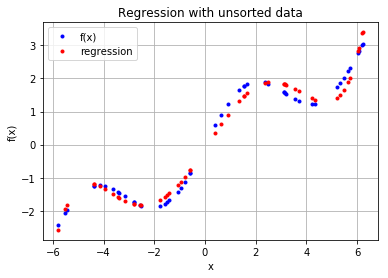

In [26]:
plt.plot(xu, yu, 'b.', label = 'f(x)')
plt.plot(xu, y_hat, 'r.', label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with unsorted data')

### Multi-dimensional Data

In [27]:
def fm(x, y):
    return np.sin(x) + 0.25 * np.sqrt(y) + 0.05 * y**2
x = np.linspace(0, 10, 21)
y = np.linspace(0, 10, 21)
X, Y = np.meshgrid(x, y)
# generates 2-d grids out of the 1-d arrays
Z = fm(X,Y)
x = X.flatten()
y = Y.flatten()
# yields 1-d arrays from the 2-d grids

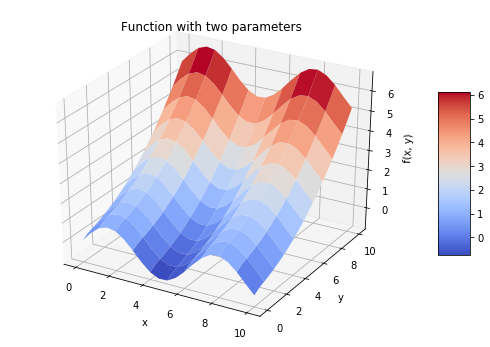

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (9, 6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                      cmap = mpl.cm.coolwarm,
                      linewidth = 0.5,
                      antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Function with two parameters')
fig.colorbar(surf, shrink = 0.5 , aspect = 5)

In [29]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [30]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(fm(x,y), matrix).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.752e+31
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:49:15   Log-Likelihood:                 14236.
No. Observations:                 441   AIC:                        -2.846e+04
Df Residuals:                     434   BIC:                        -2.843e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.06e-15   5.77e-16     -3.571      0.0

In [32]:
beta = model.params
beta

array([-2.05998413e-15,  7.06032455e-16,  1.94289029e-16, -1.10480201e-16,
        5.00000000e-02,  1.00000000e+00,  2.50000000e-01])

In [33]:
model.rsquared

1.0

In [34]:
def reg_func(a, p):
    x, y = p
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

In [36]:
RZ = reg_func(beta, (X, Y))

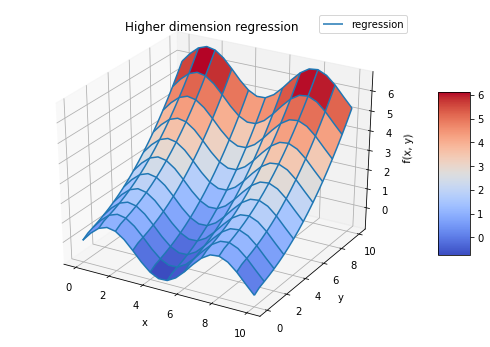

In [37]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
ax.set_title('Higher dimension regression')
fig.colorbar(surf, shrink=0.5, aspect=5)

### Interpolation
관측점 자체도 정확하게 재현해야 하고 각 관측점에서 continuously differentiable function이어야 한다.

보간: 기존의 데이터는 정확한 데이터라고 가정하고 기존에 주어지지 않은 입력 데이터에 대해 출력을 계산.

회귀: 기존의 데이터가 오차를 포함하는 부정확한 데이터라고 가정하고 출력과 입력의 관계를 추가적으로 가정.

회귀에서 polyfit과 polyval이 있다면, 보간법에서는 splrep과 splev 함수가 있다. 

In [38]:
import scipy.interpolate as spi

In [39]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [40]:
def f(x):
    return np.sin(x) + 0.5 * x

In [41]:
ipo = spi.splrep(x, f(x), k=1) # 1차 스플라인 보간법

In [42]:
ipo

(array([-6.28318531, -6.28318531, -5.75958653, -5.23598776, -4.71238898,
        -4.1887902 , -3.66519143, -3.14159265, -2.61799388, -2.0943951 ,
        -1.57079633, -1.04719755, -0.52359878,  0.        ,  0.52359878,
         1.04719755,  1.57079633,  2.0943951 ,  2.61799388,  3.14159265,
         3.66519143,  4.1887902 ,  4.71238898,  5.23598776,  5.75958653,
         6.28318531,  6.28318531]),
 array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
        -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
        -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
         1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
         1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265,
         0.        ,  0.        ]),
 1)

Text(0.5,1,'Example plot with linear interpolation')

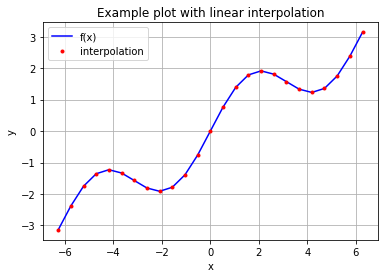

In [55]:
iy = spi.splev(x, ipo)
plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, iy, 'r.', label = 'interpolation')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example plot with linear interpolation')

In [56]:
np.allclose(f(x), iy)

True

#### Spline 보간법은 금융 분야에서 독립변수의 값을 관측할 수 없을 경우의 종속변수 값을 추정할 때 종종 사용된다.
#### 작은 구간에서 선형 스플라인을 사용하였을 경우에 보간 된 값을 자세히 살펴보자.

In [57]:
xd = np.linspace(1,3,50)
iyd = spi.splev(xd, ipo)

Text(0.5,1,'Example plot (detail) with linear interpolation')

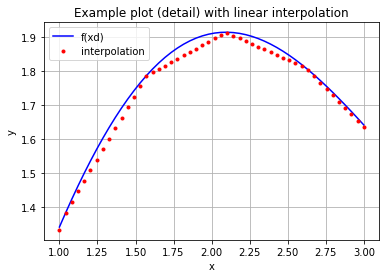

In [58]:
plt.plot(xd, f(xd), 'b', label = 'f(xd)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example plot (detail) with linear interpolation')

#### 이번에는 3차 cubic spline을 사용해보자.

In [59]:
ipo = spi.splrep(x, f(x), k = 3)
iyd = spi.splev(xd, ipo)

Text(0.5,1,'Example plot (detail) with cubic splines interpolation')

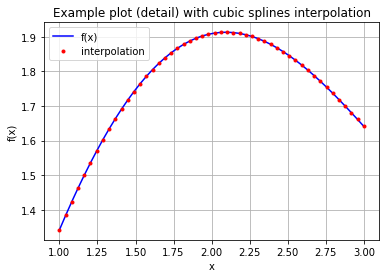

In [60]:
plt.plot(xd, f(xd), 'b', label = 'f(x)')
plt.plot(xd, iyd, 'r.', label = 'interpolation')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example plot (detail) with cubic splines interpolation')

In [61]:
np.allclose(f(xd), iyd)

False

In [62]:
np.sum((f(xd)- iyd)**2)/len(xd)

1.1349319851436252e-08

#### 수치적으로 보간이 완벽하지는 않지만 최소자승오차는 매우 작다.

#### Tip: 보간법
스플라인 보간법을 적용하면 ols 보다 더 정확한 근사 결과를 얻을 수 있으나, 보간법을 사용하려면 자료가 정렬되어 있어야 하고 잡음이 없어야 하며, 다차원 문제에는 적용할 수 없다. 또 계산량이 더 많기 때문에 ols보다 훨씬 계산 시간이 오래 걸릴 수 있다.

## Optimization
eg 1. 옵션 가격 계산을 위해 시장 자료를 기반으로 인수 교정(Calibration) 

eg 2. 대리인의 효용함수를 최적화하는 경우

Objective function fm(x, y)을 minimize하고 싶다 하자.

In [63]:
def fm(x, y):
    return np.sin(x) + 0.05 * x**2 + np.sin(y) + 0.05 * y**2
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)

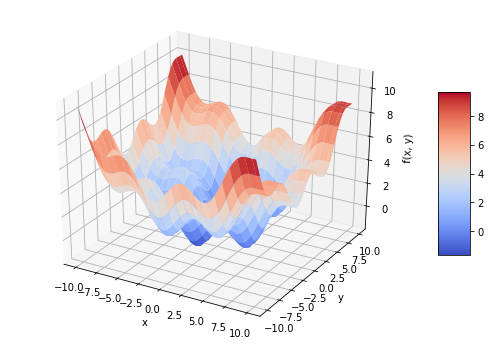

In [64]:
fig = plt.figure(figsize= (9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2,
                      cmap=mpl.cm.coolwarm, linewidth = 0.5,
                      antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

#### Contour Plot을 통해 여러개의 local minima가 존재하는 것을 확인할 수 있으나 global minimum을 찾기는 쉽지 않다. 
#### 이제 전역 최소화 방법과 국소 최소화 방법을 구현하고자 한다. 사용하는 함수 brute와 fmin은 scipy.optimize에 있다.

In [65]:
import scipy.optimize as spo

In [66]:
def fo(p):
    x, y = p
    z = fm(x, y)
    if output == True:
        print('%8.4f % 8.4f %8.4f' %(x, y, z))
    return z

In [75]:
output = True
## brute force로 x, y 값을 각각 -10부터 10까지 5단위 step으로 끊은 후 grid를 만들어 대입한다.
## 첫번째 column은 x값, 두번째 column은 y값, 세번째 column은 함수값. fo 함수에서 output이 True이기 때문에 print를 하기 때문!
spo.brute(fo, ((-10, 10.01, 5), (-10, 10.01, 5)), finish=None) 

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

In [87]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1 # fo를 최소화하는 x,y 값을 return.

array([-1.4, -1.4])

In [89]:
fm(opt1[0], opt1[1]) # 최소값

-1.7748994599769203

### Local Optimization
대부분의 최적화 문제에서 국소 최소값을 구하기 전에 전역 최소화를 할 것을 권장한다. 국소 최소화 알고리즘이 일단 어떤 국소 최저점에 빠져버리게 되면 더 나은 국소 최솟값이나 전역 최솟값을 찾아내지 못하기 때문이다(NP-hard)

In [98]:
output = True
opt2 = spo.fmin(fo, opt1, xtol = 0.001, ftol = 0.01, maxiter = 15, maxfun = 20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

#### 잘못된 initial point에서 시작하면 엉뚱한 해를 최소값으로 찾아낸다.

In [102]:
output = False
opt_incorrect = spo.fmin(fo, (2., 2.), maxiter=250)
print(opt_incorrect)
print(fm(opt_incorrect[0],opt_incorrect[1]))

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86
[4.2710728  4.27106945]
0.0158257532746805


### Constrained Optimization

In [104]:
from numpy import sqrt
# objective function
def Eu(p):
    s, b = p
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))
# Constraints
cons = ({'type': 'ineq', 'fun': lambda p: 100 - 10 * (p[0]+ p[1])})
# Budget Constraint
bnds = ((0,1000), (0, 1000)) # upper bounds large enough

In [105]:
result = spo.minimize(Eu, [5, 5], method = 'SLSQP',
                     bounds = bnds, constraints = cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [109]:
result['x'] # Optimal Holdings

array([8.02547122, 1.97452878])

In [108]:
-result['fun'] # Optimal Maximum value

9.700883611487832

In [112]:
# 최적 주식 수만큼 주식을 사면 모든 예산을 써버리게 된다.
np.round(np.dot(result['x'], [10, 10]), 4)

100.0

### Integration

In [113]:
import scipy.integrate as sci

In [114]:
def f(x):
    return np.sin(x) + 0.5 * x

In [116]:
a = 0.5 # 정적분의 좌극한
b = 9.5 # 정적분의 우극한
x = np.linspace(0,10)
y = f(x)

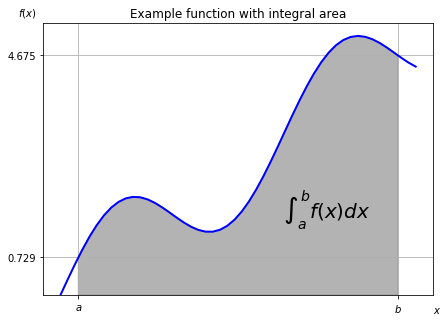

In [127]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize = (7, 5))
plt.plot(x, y, 'b', linewidth = 2)
plt.ylim(ymin=0)
plt.title("Example function with integral area")
plt.grid(True)

# 함수 아래의 정적분 구간
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b,0)]
poly = Polygon(verts, facecolor = '0.7', edgecolor = '0.6')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment = 'center', fontsize = 20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks((f(a), f(b)))

### Numerical Integration

In [138]:
sci.fixed_quad(f, a, b)[0] # 가우스 구적법

24.366995967084602

In [139]:
sci.quad(f,a,b)[0] # 적응식 구적법

24.374754718086752

In [137]:
sci.romberg(f,a,b) # romberg 적분법

24.374754718086713

In [133]:
xi = np.linspace(0.5, 9.5, 25)

In [134]:
sci.trapz(f(xi), xi) ## 사다리꼴법을 사용.

24.352733271544516

In [136]:
sci.simps(f(xi), xi) ## simpson 방법

24.37496418455075

### Integration by MC Simulation
정적분 구간 사이에 있는 임의의 x 값들을 생성하여 이 값들에 대해 함수 값을 계산하고 이들의 평균값을 구하면 적분 구간에 대한 함수의 평균값을 구한 것과 같다. 이 평균값을 적분 구간의 길이와 곱하여 적분 구간에 대한 정적분 값을 추정한다.

In [145]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random_sample(i * 10) * (b - a) + a 
    # Uniform(0.5, 9.5) 분포에서 (10*i)개의 sample 추출 후
    # 각 sample에서 함수값들을 더한 다음에 샘플 갯수로 나눈다.
    print(10*i, np.sum(f(x))/len(x) * (b - a))

10 24.804762279331463
20 26.522918898332378
30 26.265547519223976
40 26.02770339943824
50 24.99954181440844
60 23.881810141621663
70 23.527912274843253
80 23.507857658961207
90 23.67236746066989
100 23.679410416062886
110 24.424401707879305
120 24.239005346819056
130 24.115396924962802
140 24.424191987566726
150 23.924933080533783
160 24.19484212027875
170 24.117348378249833
180 24.100690929662274
190 23.76905109847816


### Symbolic Computation

In [1]:
import sympy as sy

In [7]:
# Automatically enable the best printer available 
# in your environment.
sy.init_printing()

In [8]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [9]:
sy.sqrt(x)

In [10]:
3 + sy.sqrt(x) - 5**2

In [11]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [12]:
sy.simplify(f)

In [13]:
print(sy.pretty(sy.sqrt(x) + 0.5))

√x + 0.5


In [14]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [15]:
pi_str[-40:]

'8245672736856312185020980470362464176198'

In [16]:
pi_str.find('122091')

### Equations

In [190]:
sy.solve(x ** 2 - 1)

In [191]:
sy.solve(x ** 2 - 1 - 3)

In [192]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

In [193]:
sy.solve(x ** 2 + y ** 2)

### Integration

In [194]:
a, b = sy.symbols('a b')

In [195]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

b                    
⌠                    
⎮ (0.5⋅x + sin(x)) dx
⌡                    
a                    


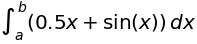

In [198]:
sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))

In [201]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
int_func

In [209]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [210]:
Fb - Fa 

In [208]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

In [212]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
int_func_limits

In [216]:
int_func_limits.subs({a : 0.5, b : 9.5})

In [217]:
int_func.diff()

In [223]:
f = sy.sin(x) + 0.05 * x ** 2 + sy.sin(y) + 0.05 * y ** 2
f

In [220]:
del_x = sy.diff(f, x)
del_y = sy.diff(f, y)

In [221]:
del_x

In [222]:
del_y

#### 전역 최소화를 위한 필요조건은 "두 개의 편미분 값이 모두 0."

In [233]:
xo = sy.nsolve(del_x, -1.5) 
# del_x = 0 을 만족하는 해. initial point = -1.5
xo

In [225]:
yo = sy.nsolve(del_y, -1.5)
yo

In [231]:
?sy.nsolve

In [230]:
f.subs({x : xo, y : yo}) # 최소값.

##### 엉뚱한 임의의 값을 시작점으로 사용하면 global minimum이 아닌 local minimum에 빠진다.

In [234]:
xo = sy.nsolve(del_x, 1.5) 
# del_x = 0 을 만족하는 해. initial point = -1.5
xo

In [235]:
yo = sy.nsolve(del_y, 1.5)
yo

In [237]:
f.subs({x : xo, y : yo})

#### 이 결과는 편미분 값이 0인 조건이 최적화를 위한 필요조건이지만 충분조건은 아님을 보여준다.

### Tip: 심볼릭 연산
파이썬으로 수학을 풀이할 때는 항상 Sympy를 사용한 심볼릭 계산을 염두에 두어야 한다. 특히 상호대화식 금융 분석시에는 심볼릭 계산이 훨씬 효율적인 방식일 수 있다.